### Часть первая. Преобразование данных

Дана матрица данных X, состоящая из двух столбцов. 
Вам следует провести два преобразования над матрицей данных.

1. Нормализация. Необходимо перевести все элементы X[:, 0]  в отрезок [0, 1]. Многие вычислительные методы будут сходиться быстрее, если сначала отнормализовать все переменные. 

2. Стандартизация -- из каждого элемента стоблцов X[:, 0]  необходимо вычесть среднее, а затем поделить на стандартное отклонение ( корень из дисперсии). Зачем это нужно? Например, вы кластеризуете недвижимость Москвы. Вы имеете два набора данных, в первом площадь измерена в квадратных метрах, во втором в футах. Нормализуя оба массива данных вы приведете их в одну шкалу.

3. Логорифмирование. Каждый элемент X[:, 1] необходимо прологорифмировать. Поскольку нередко встречаются данные, все значения которых лежат около 0. А маленькие значения требуют высокой вычислительной точности. То, хорошо их логарифмировать. Логарифм функция монотонная, таким образом мы сохраняем отношение порядка между элементами.  



In [34]:
import pylab as plt
import numpy as np


%pylab inline

Populating the interactive namespace from numpy and matplotlib


`%matplotlib` prevents importing * from pylab and numpy


#### Моделируем данные


X[:, 0] -- выборка из нормального распределения со средним 10 и дисперсией 4.

X[:, 1] -- выборка из равномерного распределения на отрезке [0, 1]

In [35]:
X = np.array([np.random.normal(loc=10, scale=4, size=100), np.random.uniform(size=100)]).T

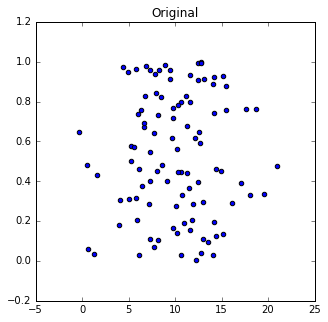

In [36]:
plt.figure(figsize=(5,5))
plt.scatter(X[:, 0], X[:, 1])
plt.title("Original")
plt.show()

#### Нормализация
Для вектора X[:, 0]

1. Вычисляем минимальное значение вектора
2. Вычисляем максимальное
3. Вычисляем разницу между минимальным и максимальным значением
4. Из каждого элемента вектора вычитаем минимум, делим на разницу между минимальным и максимальным значением
5. Рисуем график

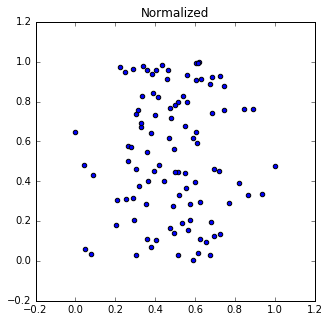

In [37]:
min_value = X[:, 0].min()
max_value = X[:, 0].max()
min_max_diference = max_value - min_value

normalized_X_0 = (X[:, 0]-min_value)/min_max_diference

plt.figure(figsize=(5,5))
plt.scatter(normalized_X_0, X[:, 1])
plt.title("Normalized")
plt.show()
# нарисуйте график, воспользовавшись функцией plt.scatter

#### Стандартизация

Для вектора X[:, 0]

1. Вычисляем среднее и дисперсию, с помощью функций mean и std.
2. Вычитаем среднее из каждого элемента вектора среднее, делим на дисперсию.
3. Рисуем картинку

Mean 10.012942
Standard deviation 4.219393


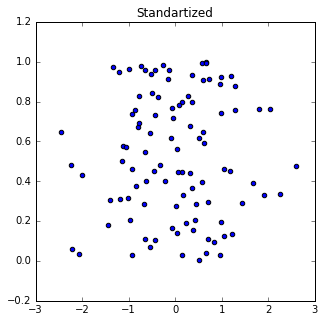

In [38]:
mu = X[:, 0].mean()
print "Mean %f" % mu
std = X[:, 0].std()
print "Standard deviation %f" % std 
X[:, 0] = (X[:, 0]-mu)/std# сделайте преобразование

plt.figure(figsize=(5,5))
plt.scatter(X[:, 0], X[:, 1])
plt.title("Standartized")
plt.show()

### Логарифмирование

1. К каждому элементу вектора X[:, 1] применяем функцию np.log
2. Рисуем картинку

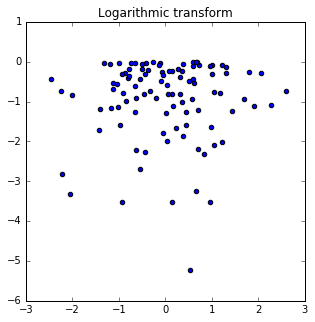

In [39]:
X[:, 1] = np.log(X[:, 1])

plt.figure(figsize=(5,5))
plt.scatter(X[:, 0], X[:, 1])
plt.title("Logarithmic transform")
plt.show()

## Часть вторая
Применить k-means к смоделированным данным.
1. Смоделировать данные 
2. Применить k-means
3. Нарисовать кластера

#### Моделируем данные 

Моделируем выборку из многомерного нормального распределения. С векторами средних [10, 0] и [0, 20]. И ковариционной марицей 

3 1

1 4

Рисуем их на плоскости.

Number of row 200, number of columns 2 


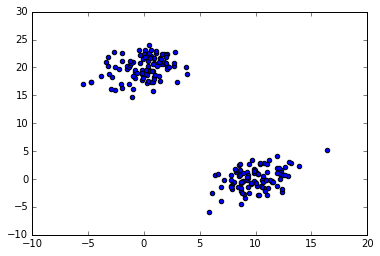

In [46]:
np.random.seed(4711)  
a = np.random.multivariate_normal([10, 0], [[3, 1], [1, 4]], size=[100,])
b = np.random.multivariate_normal([0, 20], [[3, 1], [1, 4]], size=[100,])
X = np.concatenate((a, b),)
print "Number of row %d, number of columns %d " % X.shape  
plt.scatter(X[:,0], X[:,1])
plt.show()

#### Кластеризация

1. Из модуля sklearn импортируем KMeans
2. Вызываем алгоритм кластеризации. Функция fit
3. Выводим на экран координаты центройды (cluster centers)
4. Достаем номер кластера для каждой точки (labels_)
5. Рисуем кластера

In [47]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=2).fit(X)

In [48]:
kmeans.cluster_centers_

array([[ -0.06742782,  19.95298361],
       [  9.96258848,   0.06086587]])

In [49]:
kmeans.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int32)

<function matplotlib.pyplot.show>

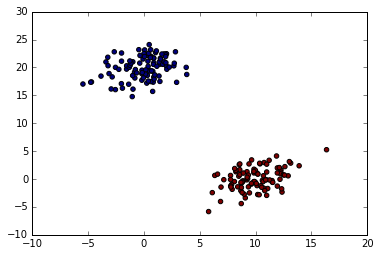

In [53]:
plt.scatter(X[:, 0], X[:, 1], c=kmeans.labels_)
plt.show